In [25]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [26]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [8 4 0 5 7 1 5 6 5 3]


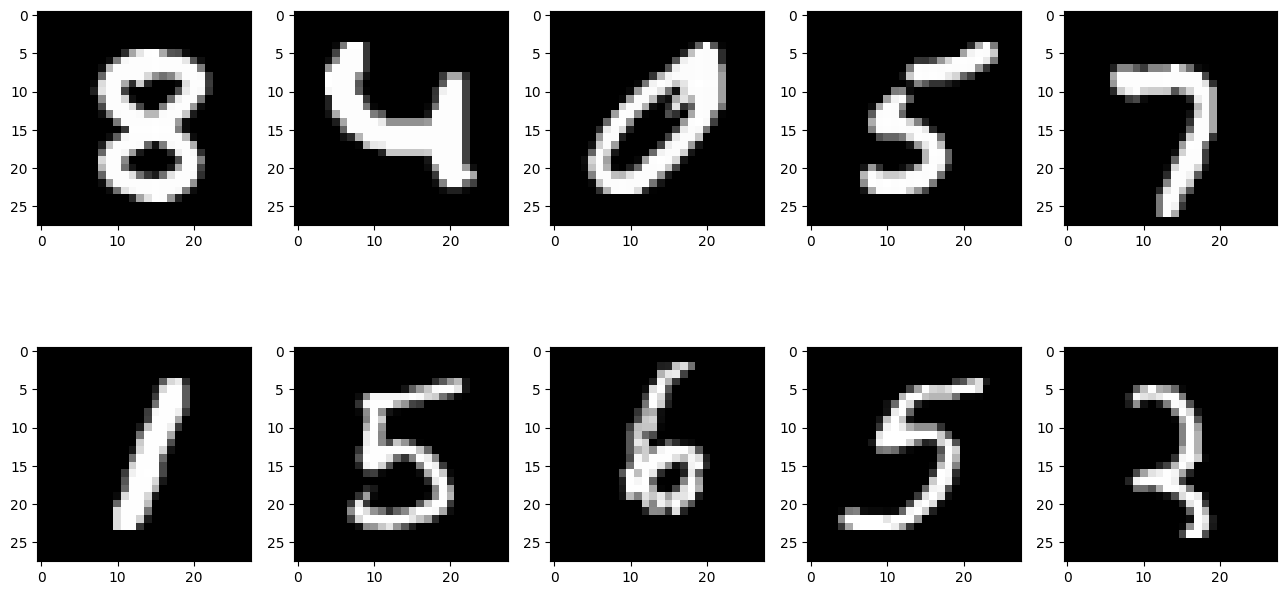

In [27]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [28]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [29]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [31]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8448 - loss: 0.5251
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9585 - loss: 0.1374
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9710 - loss: 0.0931
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9786 - loss: 0.0692
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9812 - loss: 0.0572
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9840 - loss: 0.0495
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9877 - loss: 0.0397
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9878 - loss: 0.0394
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9905 - loss: 0.0303
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9916 - loss: 0.0265


Plot the loss and accuracy graphs

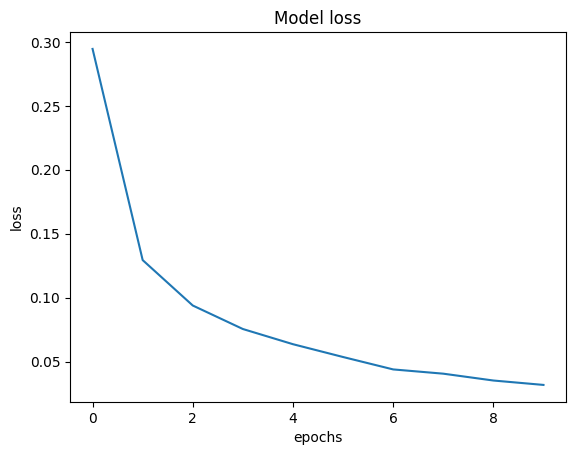

In [32]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

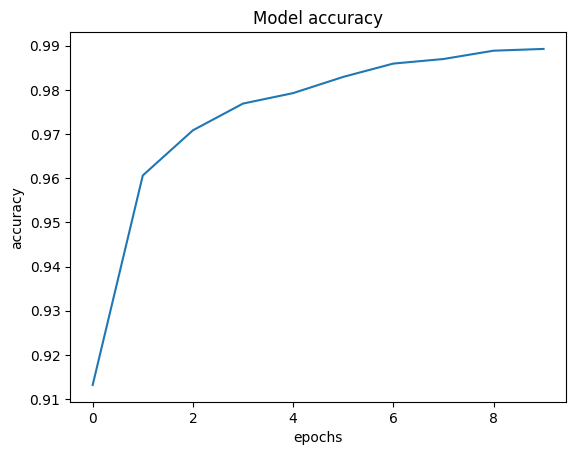

In [34]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [35]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9648 - loss: 0.1316
Loss of the Test dataset is: 0.11648327857255936
Accuracy of the test dataset is: 0.9696999788284302


Save the model weights

In [ ]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

modified code snippet

In [40]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Change hyperparameters: Add more layers and neurons, and adjust the learning rate
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model with a smaller learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a smaller batch size and more epochs
train_info = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8715 - loss: 0.4621 - val_accuracy: 0.9648 - val_loss: 0.1194
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9701 - loss: 0.0969 - val_accuracy: 0.9715 - val_loss: 0.0906
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9832 - loss: 0.0558 - val_accuracy: 0.9741 - val_loss: 0.0861
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accuracy: 0.9777 - val_loss: 0.0791
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9772 - val_loss: 0.0868
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9945 - loss: 0.0187 - val_accuracy: 0.9765 - val_loss: 0.0943
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9941 - loss: 0.0173 - val_accuracy: 0.9751 - val_loss: 0.0992
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9957 - loss: 0.0140 - v

This code includes:

    Increased the number of neurons in the hidden layers.
    Reduced the learning rate for better convergence.
    Increased the number of epochs for more training iterations.

You can run this in your environment, and it should improve the model's accuracy. After this, you can proceed to add L1 and L2 regularization and visualize the class-wise performance with a confusion matrix. Let me know if you need further assistance with these tasks! ​
​

Here’s how you can modify the model to include L1 and L2 regularization

In [39]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Add L1 and L2 regularization
l1_l2_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001)

# Define the model with regularization
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,),
                 kernel_regularizer=l1_l2_regularizer),
    layers.Dense(512, activation='relu',
                 kernel_regularizer=l1_l2_regularizer),
    layers.Dense(10, activation='softmax')
])

# Compile the model with a smaller learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with a smaller batch size and more epochs
train_info = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.8183 - loss: 8.5210 - val_accuracy: 0.8957 - val_loss: 0.9019
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9005 - loss: 0.8271 - val_accuracy: 0.9194 - val_loss: 0.6534
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9116 - loss: 0.6545 - val_accuracy: 0.9226 - val_loss: 0.6004
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9168 - loss: 0.6045 - val_accuracy: 0.9264 - val_loss: 0.5622
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9238 - loss: 0.5652 - val_accuracy: 0.9320 - val_loss: 0.5306
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9283 - loss: 0.5464 - val_accuracy: 0.9315 - val_loss: 0.5294
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9293 - loss: 0.5301 - val_accuracy: 0.9342 - val_loss: 0.5111
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9325 - loss: 0.5106 - 

Explanation:

    L1 Regularization (l1=0.001): Adds a penalty equal to the absolute value of the weights.
    L2 Regularization (l2=0.001): Adds a penalty equal to the square of the weights.
    The kernel_regularizer argument in each Dense layer applies these penalties.

You can run this code in your environment to retrain the model with L1 and L2 regularization and observe the changes in performance. If you need further steps, like visualizing the results with a confusion matrix, let me know!

exerise 3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8250 - loss: 8.4781 - val_accuracy: 0.8977 - val_loss: 0.8973
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8952 - loss: 0.8352 - val_accuracy: 0.9168 - val_loss: 0.6623
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9086 - loss: 0.6585 - val_accuracy: 0.9239 - val_loss: 0.5908
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9210 - loss: 0.5893 - val_accuracy: 0.9250 - val_loss: 0.5589
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9225 - loss: 0.5616 - val_accuracy: 0.9304 - val_loss: 0.5335
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.9278 - loss: 0.5370 - val_accuracy: 0.9347 - val_loss: 0.5160
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9328 - loss: 0.5132 - val_accuracy: 0.9377 - val_loss: 0.4961
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9322 - loss: 0.5056 - 

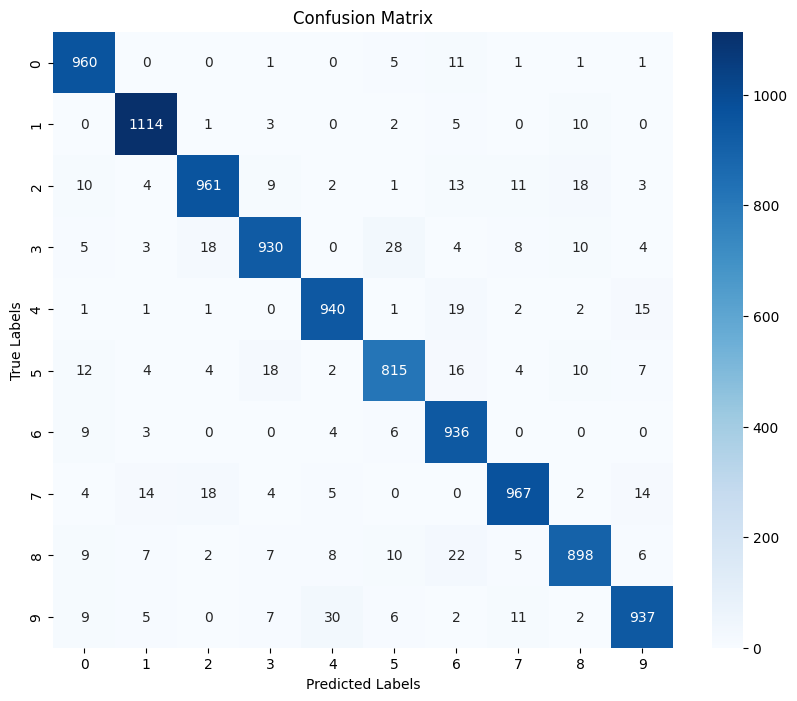

In [37]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load and preprocess the data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the images
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# Define the model with L1 and L2 regularization
l1_l2_regularizer = regularizers.l1_l2(l1=0.001, l2=0.001)

model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,),
                 kernel_regularizer=l1_l2_regularizer),
    layers.Dense(512, activation='relu',
                 kernel_regularizer=l1_l2_regularizer),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Make predictions on the test set
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Explanation:

    Model Prediction: The model predicts class probabilities, which are then converted into class labels using np.argmax.
    Confusion Matrix: The confusion_matrix function compares the true labels with the predicted labels.
    Plotting: seaborn is used for a more readable and aesthetically pleasing heatmap of the confusion matrix.

Output:

The confusion matrix will show you how many instances of each class were correctly or incorrectly classified by the model. The diagonal elements represent correct classifications, while off-diagonal elements represent misclassifications.

You can run this code in your environment to visualize the model's performance. If you need further assistance, feel free to ask!